# Bayer Pattern in Digital Cameras

The Bayer pattern is a widely used technique for color image capturing in digital cameras. Named after its inventor Bryce Bayer, the pattern employs a 2x2 array of color filters. This array is tiled across the image sensor to capture red, green, and blue (RGB) colors.

## Overview

The Bayer pattern consists of a **Color Filter Array (CFA)** placed over the camera's image sensor. In this pattern:

- 50% of the total pixels are green (G)
- 25% are red (R)
- 25% are blue (B)

This arrangement mimics human photopic vision, emphasizing the green color because the human eye is most sensitive to it.

![image.png](https://ars.els-cdn.com/content/image/3-s2.0-B9780080971292000076-f07-02-9780080971292.jpg)

## Bayer Pattern Matrix $\textbf{H}$

For simplicity, let's define the Bayer pattern in a $2 \times 2$ block:

$$
\textbf{H}_{2 \times 2} = \begin{pmatrix}
2 & 1 \\
1 & 0
\end{pmatrix}
$$

Where:
- \(0\) represents the Red filter
- \(1\) represents the Green filter
- \(2\) represents the Blue filter

You would tile this $2 \times 2$ block to form the $m \times n$ Bayer pattern matrix $\textbf{H}$ assuming the object $\textbf{f}$ is a $m \times n$ 2D matrix.

For example, a $4 \times 4$ Bayer pattern matrix would look like:

$$
\textbf{H}_{4 \times 4} = \begin{pmatrix}
2 & 1 & 2 & 1 \\
1 & 0 & 1 & 0 \\
2 & 1 & 2 & 1 \\
1 & 0 & 1 & 0
\end{pmatrix}
$$

## Applying Bayer Pattern to 2D Object $\textbf{f}$

Assuming the object $\textbf{f}$ is a $m \times n$ 2D matrix, the resulting image $\textbf{g}$ after applying the Bayer pattern can be calculated as element-wise multiplication:

$$
\textbf{g} = \textbf{H} \odot \textbf{f}
$$

Where $\odot$ denotes element-wise (Hadamard) multiplication.

### In $f$:

Each element $f_{i,j}$ in the matrix $f$ represents the light intensity coming from the corresponding point \$(i, j)$ of the object. The light intensity is assumed to be the sum of the RGB components for that point in this simplified model:

$$
f_{i,j} = R_{i,j} + G_{i,j} + B_{i,j}
$$

### In $g$:

Each element $g_{i,j}$ in the resulting image $g$ stands for the light intensity captured by the sensor at that particular pixel $(i, j)$. This intensity is modified by the Bayer filter. Specifically, it is the light intensity from the object $f_{i,j}$ multiplied by a factor depending on the color filter at that location. This factor could be 1 if the filter allows the light to pass through completely, or 0 if it blocks the light completely. In a real sensor, the factor would be a value between 0 and 1, depending on the efficiency of the filter.

So in the equation $g = H \odot f$, what we're really saying is that each pixel in $g$ is obtained by taking the corresponding pixel in $f$ and modifying it according to the Bayer pattern $H$. Specifically, each element $g_{i,j}$ in $g$ would be computed as follows:

$$
g_{i,j} = h_{i,j} \times f_{i,j}
$$

This operation essentially simulates the process of capturing an image of the object $f$ through a sensor with a Bayer filter $H$.

Using a $m \times n \times 3$ tensor would be a much better representation if we are considering color information seperately. Each slice of this 3D tensor would represent one of the RGB channels for the object. Therefore, $f$ would be a $m \times n \times 3$ tensor, where $f_{i,j,k}$ is the intensity of the color channel $k$ (Red, Green, or Blue) at spatial location $(i, j)$.

In [1]:
### complete the function below for generate_bayer_pattern and apply_bayer_to_object

import torch
import numpy as np

def generate_bayer_pattern(rows, cols):
    """
    Generates a Bayer pattern matrix of size (rows x cols).

    Parameters:
    - rows (int): Number of rows in the output matrix
    - cols (int): Number of columns in the output matrix

    Returns:
    - bayer_matrix (torch.Tensor): A torch tensor containing the Bayer pattern
    """
    # Create a 2x2 Bayer pattern with zero-indexed channels [2, 1; 1, 0]
    bayer_2x2 = torch.tensor([[2, 1],
                              [1, 0]])

    # Initialize the Bayer pattern matrix with zeros
    bayer_matrix = torch.zeros((rows, cols))

    # Fill the Bayer pattern matrix by tiling the 2x2 block
    bayer_matrix = bayer_2x2.repeat(int(np.ceil(rows/2)),int(np.ceil(cols/2)))[0:rows,0:cols]

    return bayer_matrix

### Function to Apply Bayer Pattern to a 3-Channel Object
def apply_bayer_to_object(bayer_matrix, object_tensor):
    """
    Applies the Bayer pattern to a 3-channel object tensor.

    Parameters:
    - bayer_matrix (torch.Tensor): The Bayer pattern matrix
    - object_tensor (torch.Tensor): The 3-channel object tensor with shape [Height, Width, Channels]

    Returns:
    - image_tensor (torch.Tensor): A single-channel tensor where the Bayer pattern has been applied.
    """
    # Initialize the image tensor with the same spatial dimensions but with only one color channel
    image_tensor = torch.zeros((bayer_matrix.shape[0], bayer_matrix.shape[1]))

    # Loop through each pixel and apply the Bayer pattern
    for i in range(bayer_matrix.shape[0]):
        for j in range(bayer_matrix.shape[1]):
            ### your code here
            # set image_tensor[i,j] to be equal to object_tensor[i,j] * bayer_matrix[i,j]
            image_tensor[i,j] = torch.sum(object_tensor[i,j], axis=-1) * bayer_matrix[i,j]

    return image_tensor

In [2]:
# Test the functions
rows, cols = 4, 4  # Assume a 4x4 object
object_tensor = torch.ones((rows, cols, 3))  # Create a 4x4x3 object tensor with all elements set to 1
bayer_matrix = generate_bayer_pattern(rows, cols)  # Generate the Bayer pattern
image_tensor = apply_bayer_to_object(bayer_matrix, object_tensor)  # Apply the Bayer pattern

print("Bayer Matrix:")
print(bayer_matrix)

print("Image Tensor:")
print(image_tensor)

Bayer Matrix:
tensor([[2, 1, 2, 1],
        [1, 0, 1, 0],
        [2, 1, 2, 1],
        [1, 0, 1, 0]])
Image Tensor:
tensor([[6., 3., 6., 3.],
        [3., 0., 3., 0.],
        [6., 3., 6., 3.],
        [3., 0., 3., 0.]])


In imaging systems, the Point Spread Function (PSF) is a crucial concept that describes how a single point of light in the object space is imaged onto the sensor plane. In an ideal, in-focus system, this would be a single point on the sensor as well. However, when the system is out-of-focus, the point is spread out and appears as a blur circle (or more generally, a blur "shape") in the image space.

### Mathematical Description

Mathematically, this blurring can be described as a convolution between the object $f$ and the PSF $P$. In the frequency domain, this is equivalent to multiplication. The PSF can vary based on how out-of-focus the object is, the lens characteristics, and other system aberrations.

$$
f_{\text{blur}} = f * P
$$

Where $*$ denotes the convolution operation. This convolution operation describes how each point in the object is "spread" over a region in the image due to the lens system.

For a color object $f$ that is a $m \times n \times 3$ tensor, you would perform this convolution independently for each of the RGB channels.

One commonly used PSF is the Gaussian PSF, which has a Gaussian shape. This shape is often a good approximation of the blurring that occurs in many natural and artificial systems.

$$
\text{Gaussian}(x, y) = e^{-\frac{x^2 + y^2}{2 \omega^2}}
$$

Here, $(x, y)$ are coordinates in the image, and $\omega$ is the standard deviation, which controls the "width" or "spread" of the function. After generating the Gaussian values, the PSF is normalized so that the sum of all its elements is 1. This is a common practice and ensures that the PSF does not change the overall brightness of the image when convolved.

In [3]:
size = 10
x = torch.linspace(-size // 2 + 1, size // 2, steps=size)
y = torch.linspace(-size // 2 + 1, size // 2, steps=size)
x, y = torch.meshgrid(x, y, indexing='xy')

In [4]:
print(x.shape,y.shape)

torch.Size([10, 10]) torch.Size([10, 10])


In [5]:
### complete the function below for generate_gaussian_psf

def generate_gaussian_psf(size, omega):
    """
    Generate a Gaussian PSF.

    Parameters:
        size (int): The size of the PSF grid. The grid will be of dimensions [size x size].
        omega (float): The standard deviation of the Gaussian.

    Returns:
        torch.Tensor: A [size x size] tensor representing the Gaussian PSF.
    """
    # Create coordinate grid
    x = torch.linspace(-size // 2 + 1, size // 2, steps=size)
    y = torch.linspace(-size // 2 + 1, size // 2, steps=size)
    x, y = torch.meshgrid(x, y, indexing='xy')

    # Calculate Gaussian
    gaussian = torch.exp(-(x**2 + y**2)/(2*omega**2))

    # Normalize so that the sum of all elements is 1
    gaussian = gaussian / torch.sum(gaussian)

    return gaussian

In [43]:
### complete the function below for convolve_with_psf

def convolve_with_psf(psf, object_tensor):
    """
    Convolve a given PSF (Point Spread Function) with a 3-channel object tensor.

    Parameters:
        psf (torch.Tensor): The PSF (Point Spread Function) for convolution.
        object_tensor (torch.Tensor): The object tensor with shape [height, width, channels].

    Returns:
        torch.Tensor: The convolved object tensor.
    """
    # Initialize tensor to store the blurred object
    blurred_tensor = torch.zeros_like(object_tensor)

    # Determine the amount of padding needed
    psf_size = psf.shape[0]
    pad = psf_size // 2

    # Pad the object tensor with zeros at the borders for height and width only
    object_padded = torch.nn.functional.pad(object_tensor, (0, 0, pad, pad, pad, pad), 'constant', 0)

    # print(f"PSF Shape: {psf.shape}")  # Debug
    # print(f"Object Tensor Shape: {object_tensor.shape}")  # Debug
    # print(f"Object Padded Shape: {object_padded.shape}")  # Debug

    # Convolve PSF with object tensor channel-wise
    for c in range(object_tensor.shape[2]):  # Iterate through each channel
        for i in range(pad, object_padded.shape[0] - pad):  # Iterate through the height
            for j in range(pad, object_padded.shape[1] - pad):  # Iterate through the width

                # Extract a window of the same size as the PSF centered at (i, j)
                extracted_window = object_padded[(i-pad):(i+pad+1),(j-pad):(j+pad+1),c] if psf_size % 2 != 0 else object_padded[(i-pad):(i+pad),(j-pad):(j+pad),c]

                # Calculate the blurred value for this window and PSF
                blurred_value = torch.sum(extracted_window * psf)

                # Store the blurred value in the output tensor
                blurred_tensor[i-pad,j-pad,c] = blurred_value

    return blurred_tensor

In [44]:
# Generate Gaussian PSF with size=3 and sigma=1.0
psf = generate_gaussian_psf(3, 1.0)

# Generate a random object with dimensions [height, width, channels]
height, width, channels = 4, 4, 3
object_tensor = torch.rand(height, width, channels)

# Convolve the PSF with the 3-channel object tensor
blurred_tensor = convolve_with_psf(psf, object_tensor)

print("PSF Tensor:")
print(psf)
print("Object Tensor:")
print(object_tensor[:, :, 0])
print("Blurred Tensor:")
print(blurred_tensor[:, :, 0])

PSF Tensor:
tensor([[0.0751, 0.1238, 0.0751],
        [0.1238, 0.2042, 0.1238],
        [0.0751, 0.1238, 0.0751]])
Object Tensor:
tensor([[0.8096, 0.1804, 0.7885, 0.5437],
        [0.8089, 0.1122, 0.5976, 0.1388],
        [0.6709, 0.4465, 0.5889, 0.9957],
        [0.2566, 0.5312, 0.1856, 0.7652]])
Blurred Tensor:
tensor([[0.2962, 0.3543, 0.3435, 0.2707],
        [0.4095, 0.4894, 0.4864, 0.3965],
        [0.3725, 0.4657, 0.5121, 0.4470],
        [0.2348, 0.3131, 0.3797, 0.3468]])


### Bayer Pattern Application on Blurred Image

After you have $f_{\text{blur}}$, which is the out-of-focus image, you then apply the Bayer pattern. This operation can be thought of as a form of "sampling" of $f_{\text{blur}}$ where each element in the Bayer pattern specifies which color channel information is allowed to pass through to the sensor.

### Out-of-Focus Imaging and Point Spread Function

The PSF describes how a single point in the object space gets distributed in the image space. A commonly used PSF for out-of-focus imaging is the Gaussian function as shown above.

To get the blurred image $f_{\text{blur}}$, the object $f$ is convolved with the PSF $P$ using the convolution operation $*$:

$$
f_{\text{blur}} = f * P
$$

After obtaining $f_{\text{blur}}$, the Bayer filter $H$ can be applied as usual to yield the final image $g$:

$$
g = H \odot f_{\text{blur}}
$$

This procedure outlines how a single-sensor camera with a Bayer filter can capture color images even when the object is out-of-focus. The PSF accounts for the spreading of light, and the Bayer pattern helps in sampling different color channels from this blurred image.

<span style="color:green; font-size:24px; font-weight:bold">## Now, experiment with the functions you've created to explore the impact of the omega parameter in the Gaussian PSF. Feel free to use your favorite image for this exercise. You need to save and plot the images on the camera (so after the Bayer filter) with respect to different omega in the Gaussian PSF.</span>

In [54]:
# import modules
import PIL
import matplotlib.pyplot as plt
import requests
import numpy as np
import io

# use latex font and serif font for plots
plt.rc('text', usetex=False)
plt.rc('axes', titlesize=8)

# set figure background color to white
plt.rcParams['figure.facecolor'] = 'white'

In [55]:
# define the image link
link = 'https://cdn.discordapp.com/attachments/1092808829592424509/1152961448822198342/image_from_clipboard.png'

# load the image file
bytes_data = requests.get(link).content

# convert the bytes data to image data
image_data = torch.tensor(np.array(PIL.Image.open(io.BytesIO(bytes_data))))

# check the shape of the image data
image_data.shape

torch.Size([346, 348, 3])

In [56]:
# define values of omega to investigate
omegas = np.logspace(-1,3,5)

In [57]:
# define the bayer pattern to use to represent the measured signal
bayer_pattern = generate_bayer_pattern(image_data.shape[0],image_data.shape[1])

bayer_pattern.shape

torch.Size([346, 348])

Image 0 Processed.
Image 1 Processed.
Image 2 Processed.
Image 3 Processed.
Image 4 Processed.


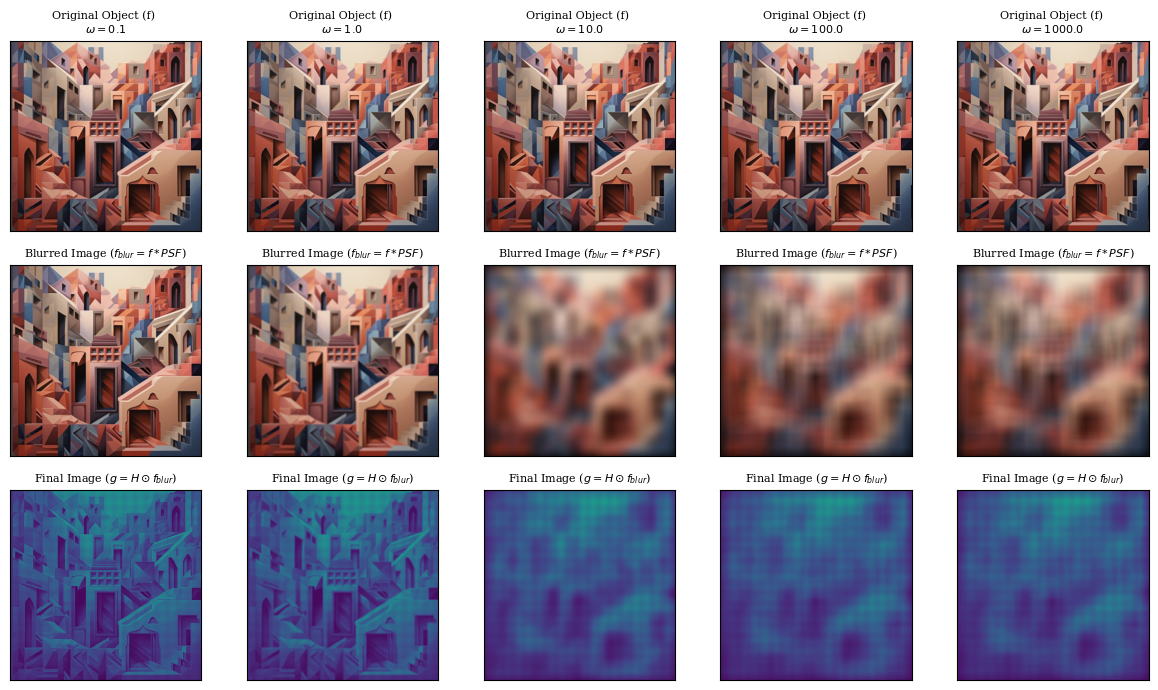

In [59]:
# 1. create the subplot figure
fig, axs = plt.subplots(3,len(omegas),figsize=(12,7))

# 2. iterate over the omegas
for i, omega in enumerate(omegas):
  # 3. plot the images and successive transformations in each column
  # 3.1 plot the original image in the top of the column
  axs[0,i].imshow(image_data.numpy())
  axs[0,i].set_xticks([])
  axs[0,i].set_yticks([])
  axs[0,i].set_title(f'Original Object (f) \n$\omega = {omega}$')

  # 3.2 plot the blurred image in the second row
  # 3.2.1 generate the psf window
  psf = generate_gaussian_psf(image_data.numpy().shape[0]//10,omega=omega)
  # 3.2.2 generate the blurred image
  blurred_image = convolve_with_psf(psf,image_data)
  axs[1,i].imshow(blurred_image.numpy())
  axs[1,i].set_yticks([])
  axs[1,i].set_xticks([])
  axs[1,i].set_title(r'Blurred Image ($f_{blur} = f * PSF$)')

  # 3.3 plot the measured signal by applying the Bayer Filter
  # 3.3.1 apply the bayer filter
  g = apply_bayer_to_object(bayer_pattern,blurred_image)
  # 3.3.2 plot the data on the third row
  axs[2,i].imshow(g.numpy())
  axs[2,i].set_yticks([])
  axs[2,i].set_xticks([])
  axs[2,i].set_title(r'Final Image ($g = H \odot f_{blur}$)')

  print(f'Image {i} Processed.')

# . Use tight layout and show the plot
plt.tight_layout()
plt.show()

In [62]:
save_path = 'omega-image-processing.png'
fig.savefig(save_path, bbox_inches='tight', pad_inches=0.25, dpi=600)